# Building data pipelines with medallion architecture
Databricks provides tools like Spark Declarative Pipelines that allow users to instantly build data pipelines with Bronze, Silver and Gold tables from just a few lines of code. And, with streaming tables and materialized views, users can create streaming Lakeflow pipelines built on Apache Spark


## 1. Bronze layer (raw data)
The Bronze layer is where we land all the data from external source systems. The table structures in this layer correspond to the source system table structures "as-is," along with any additional metadata columns that capture the load date/time, process ID, etc. The focus in this layer is quick Change Data Capture and the ability to provide an historical archive of source (cold storage), data lineage, auditability, reprocessing if needed without rereading the data from the source system.

---

## 2. Silver layer (cleansed and conformed data)
In the Silver layer of the lakehouse, the data from the Bronze layer is matched, merged, conformed and cleansed ("just-enough") so that the Silver layer can provide an "Enterprise view" of all its key business entities, concepts and transactions. (e.g. master customers, stores, non-duplicated transactions and cross-reference tables). This is done using a combination of data engineering techniques and tools such as Spark SQL, Delta Lake operations, and ETL (Extract, Transform, Load) pipelines. These processes typically involve:

- **Data validation and deduplication**: Removing duplicates and validating records to ensure data quality.
- **Data cleansing:** Correcting errors, handling missing values, and standardizing formats.
- **Data conformance**: Aligning data to a common schema or business logic, such as matching customer records across sources.
- **Data merging**: Integrating data from multiple Bronze tables or sources to create unified, enriched datasets.

These transformations are implemented using Spark DataFrames, SQL queries, and Delta Lake features within Databricks notebooks or workflows. The result is a curated, enterprise-ready dataset in the Silver layer that supports analytics and machine learning

> The Silver layer brings the data from different sources into an Enterprise view and enables self-service analytics for ad-hoc reporting, advanced analytics and ML. It serves as a source for Departmental Analysts, Data Engineers and Data Scientists to further create projects and analysis to answer business problems via enterprise and departmental data projects in the Gold Layer.

---

## 3. Gold layer (curated business-level tables)
Data in the Gold layer of the lakehouse is typically organized in consumption-ready "project-specific" databases. The Gold layer is for reporting and uses more de-normalized and read-optimized data models with fewer joins. The final layer of data transformations and data quality rules are applied here. Final presentation layer of projects such as Customer Analytics, Product Quality Analytics, Inventory Analytics, Customer Segmentation, Product Recommendations, Marking/Sales Analytics etc. fit in this layer. 

---

### Performing Bronze Operations 🥉:

In [0]:
import pyspark.sql.functions as F

# BRONZE: Raw ingestion
raw = spark.read.csv("/Volumes/workspace/default/my-volume/export.csv", header=True, inferSchema=True)

raw.withColumn("ingestion_ts", F.current_timestamp()).write.format("delta").mode("overwrite").save("/Volumes/workspace/default/my-volume/delta/bronze/events")

In [0]:
display(raw)

id,firstName,middleName,lastName,gender,birthDate,ssn,salary
1,Pennie,Carry,Hirschmann,F,1955-07-02T04:00:00.000Z,981-43-9345,56172
2,An,Amira,Cowper,F,1992-02-08T05:00:00.000Z,978-97-8086,40203
3,Quyen,Marlen,Dome,F,1970-10-11T04:00:00.000Z,957-57-8246,53417
4,Coralie,Antonina,Marshal,F,1990-04-11T04:00:00.000Z,963-39-4885,94727
5,Terrie,Wava,Bonar,F,1980-01-16T05:00:00.000Z,964-49-8051,79908
6,Chassidy,Concepcion,Bourthouloume,F,1990-11-24T05:00:00.000Z,954-59-9172,64652
7,Geri,Tambra,Mosby,F,1970-12-19T05:00:00.000Z,968-16-4020,38195
8,Patria,Nancy,Arstall,F,1985-01-02T05:00:00.000Z,984-76-3770,102053
9,Terese,Alfredia,Tocque,F,1967-11-17T05:00:00.000Z,967-48-7309,91294
10,Wava,Lyndsey,Jeandon,F,1963-12-30T05:00:00.000Z,997-82-2946,56521


In [0]:
display(spark.read.load("/Volumes/workspace/default/my-volume/delta/bronze/events"))

id,firstName,middleName,lastName,gender,birthDate,ssn,salary,ingestion_ts
1,Pennie,Carry,Hirschmann,F,1955-07-02T04:00:00.000Z,981-43-9345,56172,2026-01-15T10:13:35.466Z
2,An,Amira,Cowper,F,1992-02-08T05:00:00.000Z,978-97-8086,40203,2026-01-15T10:13:35.466Z
3,Quyen,Marlen,Dome,F,1970-10-11T04:00:00.000Z,957-57-8246,53417,2026-01-15T10:13:35.466Z
4,Coralie,Antonina,Marshal,F,1990-04-11T04:00:00.000Z,963-39-4885,94727,2026-01-15T10:13:35.466Z
5,Terrie,Wava,Bonar,F,1980-01-16T05:00:00.000Z,964-49-8051,79908,2026-01-15T10:13:35.466Z
6,Chassidy,Concepcion,Bourthouloume,F,1990-11-24T05:00:00.000Z,954-59-9172,64652,2026-01-15T10:13:35.466Z
7,Geri,Tambra,Mosby,F,1970-12-19T05:00:00.000Z,968-16-4020,38195,2026-01-15T10:13:35.466Z
8,Patria,Nancy,Arstall,F,1985-01-02T05:00:00.000Z,984-76-3770,102053,2026-01-15T10:13:35.466Z
9,Terese,Alfredia,Tocque,F,1967-11-17T05:00:00.000Z,967-48-7309,91294,2026-01-15T10:13:35.466Z
10,Wava,Lyndsey,Jeandon,F,1963-12-30T05:00:00.000Z,997-82-2946,56521,2026-01-15T10:13:35.466Z


---
### Performing Silver Operation 🥈:

In [0]:
# SILVER: Cleaned data
bronze = spark.read.format("delta").load("/Volumes/workspace/default/my-volume/delta/bronze/events")

In [0]:
from pyspark.sql.functions import concat,col,lit

# display(
#     bronze.select(
#         concat(
#             col("firstName"),
#             col("middleName"),
#             col("lastName")
#         ).alias("fullName")
#     )
# )


display(
    bronze.select(concat(
        bronze['firstName'],lit(" "),
        bronze['middleName'],lit(" "),
        bronze['lastName']
    )).alias("fullName")
)

"concat(firstName, , middleName, , lastName)"
Pennie Carry Hirschmann
An Amira Cowper
Quyen Marlen Dome
Coralie Antonina Marshal
Terrie Wava Bonar
Chassidy Concepcion Bourthouloume
Geri Tambra Mosby
Patria Nancy Arstall
Terese Alfredia Tocque
Wava Lyndsey Jeandon


In [0]:
bronze = bronze.withColumn(
    "fullName",
    concat(
        bronze["firstName"],
        lit(" "),
        bronze["middleName"],
        lit(" "),
        bronze["lastName"]
    )
)

display(bronze)

id,firstName,middleName,lastName,gender,birthDate,ssn,salary,ingestion_ts,fullName
1,Pennie,Carry,Hirschmann,F,1955-07-02T04:00:00.000Z,981-43-9345,56172,2026-01-15T10:13:35.466Z,Pennie Carry Hirschmann
2,An,Amira,Cowper,F,1992-02-08T05:00:00.000Z,978-97-8086,40203,2026-01-15T10:13:35.466Z,An Amira Cowper
3,Quyen,Marlen,Dome,F,1970-10-11T04:00:00.000Z,957-57-8246,53417,2026-01-15T10:13:35.466Z,Quyen Marlen Dome
4,Coralie,Antonina,Marshal,F,1990-04-11T04:00:00.000Z,963-39-4885,94727,2026-01-15T10:13:35.466Z,Coralie Antonina Marshal
5,Terrie,Wava,Bonar,F,1980-01-16T05:00:00.000Z,964-49-8051,79908,2026-01-15T10:13:35.466Z,Terrie Wava Bonar
6,Chassidy,Concepcion,Bourthouloume,F,1990-11-24T05:00:00.000Z,954-59-9172,64652,2026-01-15T10:13:35.466Z,Chassidy Concepcion Bourthouloume
7,Geri,Tambra,Mosby,F,1970-12-19T05:00:00.000Z,968-16-4020,38195,2026-01-15T10:13:35.466Z,Geri Tambra Mosby
8,Patria,Nancy,Arstall,F,1985-01-02T05:00:00.000Z,984-76-3770,102053,2026-01-15T10:13:35.466Z,Patria Nancy Arstall
9,Terese,Alfredia,Tocque,F,1967-11-17T05:00:00.000Z,967-48-7309,91294,2026-01-15T10:13:35.466Z,Terese Alfredia Tocque
10,Wava,Lyndsey,Jeandon,F,1963-12-30T05:00:00.000Z,997-82-2946,56521,2026-01-15T10:13:35.466Z,Wava Lyndsey Jeandon


In [0]:
bronze.printSchema()

root
 |-- id: integer (nullable = true)
 |-- firstName: string (nullable = true)
 |-- middleName: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthDate: timestamp (nullable = true)
 |-- ssn: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- ingestion_ts: timestamp (nullable = true)
 |-- fullName: string (nullable = true)



In [0]:
%python
# Filter for valid price range
filtered = bronze.filter(F.col("salary") > 0).filter(F.col("salary") < 100000)

# Remove duplicates
deduped = filtered.dropDuplicates(["ssn", "fullName"])

# Add event_date column
with_event_date = deduped.withColumn("birthdate", F.to_date("birthDate"))

# Add price_tier column
silver = with_event_date.withColumn(
    "price_tier",
    F.when(F.col("salary") < 10000, "budget")
     .when(F.col("salary") < 50000, "mid")
     .otherwise("premium")
)

In [0]:
silver.write.format("delta").mode("overwrite").save("/Volumes/workspace/default/my-volume/delta/silver/events")

---

### Performing Gold Operations🏅:

In [0]:
import pyspark.sql.functions as F

# GOLD: Aggregates
silver = spark.read.format("delta").load("/Volumes/workspace/default/my-volume/delta/silver/events")
display(silver)

id,firstName,middleName,lastName,gender,birthdate,ssn,salary,ingestion_ts,fullName,price_tier
81,Lasandra,Lin,Mowne,F,1986-03-30,984-79-5062,90966,2026-01-15T10:13:35.466Z,Lasandra Lin Mowne,premium
790,Viki,Aracely,Donnelly,F,1957-06-08,978-42-8208,38134,2026-01-15T10:13:35.466Z,Viki Aracely Donnelly,mid
134,Lura,Felisa,Eastham,F,1984-02-29,942-90-7080,50566,2026-01-15T10:13:35.466Z,Lura Felisa Eastham,premium
1,Pennie,Carry,Hirschmann,F,1955-07-02,981-43-9345,56172,2026-01-15T10:13:35.466Z,Pennie Carry Hirschmann,premium
391,Misty,Valeria,Morat,F,1989-02-27,955-92-1167,70559,2026-01-15T10:13:35.466Z,Misty Valeria Morat,premium
557,Jeanette,Alexandra,Trimmill,F,1963-07-21,904-66-7794,60047,2026-01-15T10:13:35.466Z,Jeanette Alexandra Trimmill,premium
769,Lissette,Nichole,Ronald,F,1956-02-09,931-86-8134,83845,2026-01-15T10:13:35.466Z,Lissette Nichole Ronald,premium
226,Vergie,Jasmin,Raubenheim,F,1977-12-13,997-90-2074,80201,2026-01-15T10:13:35.466Z,Vergie Jasmin Raubenheim,premium
969,Kiley,Malka,Matschoss,F,1972-11-04,952-88-9167,70790,2026-01-15T10:13:35.466Z,Kiley Malka Matschoss,premium
232,Joyce,Iona,Jantet,F,1954-01-13,912-16-7364,57929,2026-01-15T10:13:35.466Z,Joyce Iona Jantet,premium


In [0]:
price_tier_count = silver.groupBy('price_tier').agg(F.count('id').alias('id_count'))
price_tier_count.write.format("delta").mode("overwrite").save("/Volumes/workspace/default/my-volume/delta/gold/price_tier_count")

In [0]:
salary_stats = silver.groupBy("gender").agg(
    F.count("*").alias("num_people"),
    F.avg("salary").alias("avg_salary"),
    F.min("salary").alias("min_salary"),
    F.max("salary").alias("max_salary")
)

salary_stats.write.format("delta").mode("overwrite").save("/Volumes/workspace/default/my-volume/delta/gold/salary_stats")

In [0]:
display(price_tier_count)

price_tier,id_count
mid,138
premium,762
budget,1


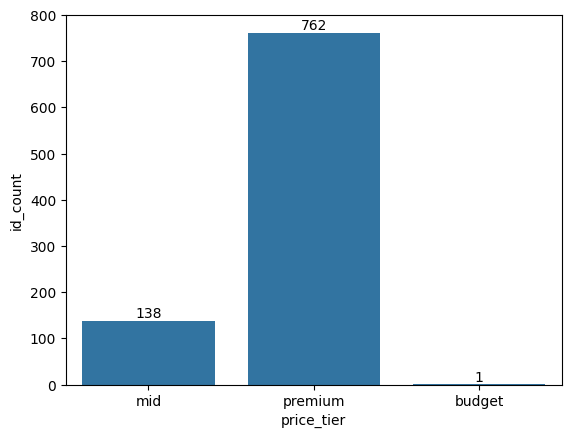

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

df = price_tier_count.toPandas()
price_tier_visual = sns.barplot(x=df["price_tier"],y=df["id_count"])

for index, row in df.iterrows():
    price_tier_visual.text(
        index, 
        row["id_count"], 
        str(row["id_count"]), 
        color="black", 
        ha="center", 
        va="bottom"
    )

plt.show()

In [0]:
price_tier_visual.get_figure().savefig("/Volumes/workspace/default/my-volume/delta/gold/price_tier_count/price_tier_count.png")

**Display the stored image**


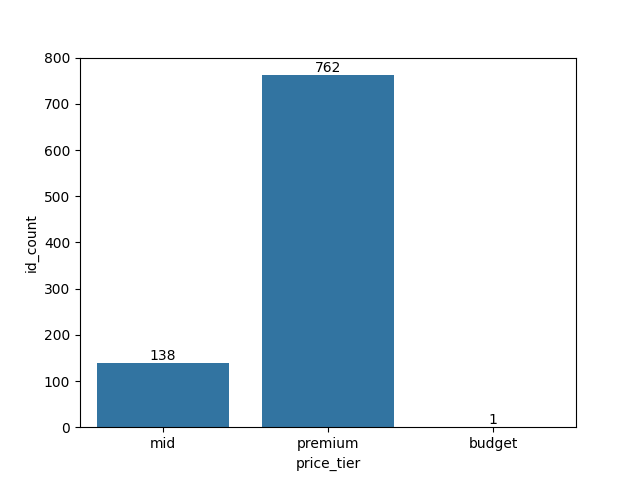

In [0]:
from IPython.display import Image,display
display(Image(
    filename="/Volumes/workspace/default/my-volume/delta/gold/price_tier_count/price_tier_count.png"
))